<a href="https://colab.research.google.com/github/HugoBacquet/dvf_python/blob/main/dvf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("test")

test


In [2]:
ls

drive/  sample_data/


In [3]:
pwd

'/content'

Install Spark 

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=2213b6dfc1523a81dfb8d3355d78d2975a4af06f3c4124cda546e87e7352480c
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


Set environment 

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [6]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

Load data

In [7]:
ls

drive/  sample_data/  spark-3.1.1-bin-hadoop3.2/  spark-3.1.1-bin-hadoop3.2.tgz


In [8]:
import wget

url2022 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt" 
url2021 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-155828/valeursfoncieres-2021.txt" 
url2020 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-161156/valeursfoncieres-2020.txt" 
url2019 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-155101/valeursfoncieres-2019.txt" 
url2018 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-154703/valeursfoncieres-2018.txt" 

wget.download(url2022)
wget.download(url2021)
wget.download(url2020)
wget.download(url2019)
wget.download(url2018)

'valeursfoncieres-2018.txt'

In [64]:
ville = "https://static.data.gouv.fr/resources/villes-de-france/20220928-173607/cities.csv"
wget.download(ville)

'cities.csv'

In [9]:
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_csv("valeursfoncieres-2022.txt", sep="|")
  
# display DataFrame
print(df)

<ipython-input-9-3520c0571c11>:4: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("valeursfoncieres-2022.txt", sep="|")


         Identifiant de document  Reference document  1 Articles CGI  \
0                            NaN                 NaN             NaN   
1                            NaN                 NaN             NaN   
2                            NaN                 NaN             NaN   
3                            NaN                 NaN             NaN   
4                            NaN                 NaN             NaN   
...                          ...                 ...             ...   
3803880                      NaN                 NaN             NaN   
3803881                      NaN                 NaN             NaN   
3803882                      NaN                 NaN             NaN   
3803883                      NaN                 NaN             NaN   
3803884                      NaN                 NaN             NaN   

         2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0                   NaN             NaN             NaN     

In [10]:
df.dtypes

Identifiant de document       float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere                object
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Commune                        object
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot    

In [11]:
df.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [12]:
df.head(10)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,NaN,0,1.0,Maison,NaN,108.0,5.0,S,NaN,649.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,360.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,50.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,4.0,Local industriel. commercial ou assimilé,NaN,424.0,0.0,S,NaN,628.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,2.0,Appartement,NaN,126.0,4.0,S,NaN,628.0


In [13]:
df[['Date mutation', 'Nature mutation', 'Valeur fonciere','No voie', 'Type de voie', 'Voie', 'Code postal','Code departement','Commune','Surface Carrez du 1er lot', 'Surface reelle bati', 'Nombre pieces principales','Surface terrain']]

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code departement,Commune,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2022,Vente,"55000,00",13.0,RUE,DE LA LIBERTE,1000.0,1,BOURG-EN-BRESSE,"24,10",24.0,1.0,NaN
1,03/01/2022,Vente,"143000,00",NaN,NaN,CHAMP COCHET,1480.0,1,SAVIGNEUX,NaN,NaN,NaN,84.0
2,03/01/2022,Vente,"143000,00",NaN,NaN,CHAMP COCHET,1480.0,1,SAVIGNEUX,NaN,NaN,NaN,88.0
3,03/01/2022,Vente,"143000,00",98.0,RTE,DE LA DOMBES,1480.0,1,SAVIGNEUX,"123,23",140.0,3.0,NaN
4,04/01/2022,Vente,"300,00",NaN,NaN,AUX PIERRES,1480.0,1,MESSIMY SUR SAONE,NaN,NaN,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,30/12/2022,Vente,"3500000,00",19.0,RUE,JEAN DOLENT,75014.0,75,PARIS 14,NaN,327.0,0.0,NaN
3803881,19/12/2022,Vente,"525000,00",3.0,RUE,FREDERIC MAGISSON,75015.0,75,PARIS 15,"46,65",0.0,0.0,NaN
3803882,19/12/2022,Vente,"525000,00",3.0,RUE,FREDERIC MAGISSON,75015.0,75,PARIS 15,"46,65",40.0,3.0,NaN
3803883,30/12/2022,Vente,"15500,00",69.0,RUE,BARRAULT,75013.0,75,PARIS 13,NaN,0.0,0.0,NaN


1. Jointure des fichiers de données 

Import des blibliotheques : 


In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit

In [15]:
df_2018 = spark.read.format("csv").option("header", "true").load("valeursfoncieres-2018.txt", sep="|")
df_2019 = spark.read.format("csv").option("header", "true").load("valeursfoncieres-2019.txt", sep="|")
df_2020 = spark.read.format("csv").option("header", "true").load("valeursfoncieres-2020.txt", sep="|")
df_2021 = spark.read.format("csv").option("header", "true").load("valeursfoncieres-2021.txt", sep="|")
df_2022 = spark.read.format("csv").option("header", "true").load("valeursfoncieres-2022.txt", sep="|")

In [70]:
location_df = spark.read.format("csv").option("header", "true").load("cities.csv", sep=",")

In [16]:
print(df_2021)

+-----------------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+---------------+---------------+-------+-----+------------+---------+--------------------+-----------+--------------------+----------------+------------+------------------+-------+-------+---------+-------+-------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------------+---------------+-----------+-----------------+-------------------+-------------------------+--------------+-----------------------+---------------+
|Identifiant de document|Reference document|1 Articles CGI|2 Articles CGI|3 Articles CGI|4 Articles CGI|5 Articles CGI|No disposition|Date mutation|Nature mutation|Valeur fonciere|No voie|B/T/Q|Type de voie|Code voie|                Voie|Code postal|             Commune|Code departement|Code commune|Prefixe de s

In [71]:
print(location_df)

+----------+--------------------+--------+--------------------+------------+-----------+---------------+-----------------+--------------------+--------------------+
|insee_code|           city_code|zip_code|               label|    latitude|  longitude|department_name|department_number|         region_name| region_geojson_name|
+----------+--------------------+--------+--------------------+------------+-----------+---------------+-----------------+--------------------+--------------------+
|     25620|       ville du pont|   25650|       ville du pont|46.999873398|6.498147193|          doubs|               25|bourgogne-franche...|Bourgogne-Franche...|
|     25624|      villers grelot|   25640|      villers grelot|47.361512085|6.235167025|          doubs|               25|bourgogne-franche...|Bourgogne-Franche...|
|     25615| villars les blamont|   25310| villars les blamont|47.368383721|6.871414913|          doubs|               25|bourgogne-franche...|Bourgogne-Franche...|
|     2561

In [72]:
location_df.dtypes

[('insee_code', 'string'),
 ('city_code', 'string'),
 ('zip_code', 'string'),
 ('label', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('department_name', 'string'),
 ('department_number', 'string'),
 ('region_name', 'string'),
 ('region_geojson_name', 'string')]

Ajout d'une colonne annee dans chaque dataframe

In [17]:
df_2018 = df_2018.withColumn("annee", lit("2018"))
df_2019 = df_2019.withColumn("annee", lit("2019"))
df_2020 = df_2020.withColumn("annee", lit("2020"))
df_2021 = df_2021.withColumn("annee", lit("2021"))
df_2022 = df_2022.withColumn("annee", lit("2022"))

In [18]:
print(df_2021)

+-----------------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+---------------+---------------+-------+-----+------------+---------+--------------------+-----------+--------------------+----------------+------------+------------------+-------+-------+---------+-------+-------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------------+---------------+-----------+-----------------+-------------------+-------------------------+--------------+-----------------------+---------------+-----+
|Identifiant de document|Reference document|1 Articles CGI|2 Articles CGI|3 Articles CGI|4 Articles CGI|5 Articles CGI|No disposition|Date mutation|Nature mutation|Valeur fonciere|No voie|B/T/Q|Type de voie|Code voie|                Voie|Code postal|             Commune|Code departement|Code commune|Prefix

Merge des 5 dataframe dans le dataframe merged_df

In [19]:
merged_df = df_2018.union(df_2019).union(df_2020).union(df_2021).union(df_2022)

In [20]:
df_2018.unpersist()
df_2019.unpersist()
df_2020.unpersist()
df_2021.unpersist()
df_2022.unpersist()

Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,annee
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"55000,00",13,null,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,01,53,null,AM,102,null,7,"24,10",null,null,null,null,null,null,null,null,1,2,Appartement,null,24,1,null,null,null,2022
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"143000,00",null,null,null,B010,CHAMP COCHET,1480,SAVIGNEUX,01,398,null,ZE,184,null,null,null,null,null,null,null,null,null,null,null,0,null,null,null,null,null,S,null,84,2022
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"143000,00",null,null,null,B010,CHAMP COCHET,1480,SAVIGNEUX,01,398,null,ZE,185,null,null,null,null,null,null,null,null,null,null,null,0,null,null,null,null,null,S,null,88,2022
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"143000,00",98,null,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,01,398,null,ZE,187,null,1,"123,23",null,null,null,null,null,null,null,null,1,2,Appartement,null,140,3,null,null,null,2022
null,null,null,null,null,null,null,000001,04/01/2022,Vente,"300,00",null,null,null,B031,AUX PIERRES,1480,MESSIMY SUR SAONE,01,243,null,A,643,null,null,null,null,null,null,null,null,null,null,null,0,null,null,null,null,null,T,null,510,2022
null,null,null,null,null,null,null,000001,06/01/2022,Vente,"255000,00",282,null,RTE,0130,DE POISATON,1560,MANTENAY-MONTLIN,01,230,null,ZM,124,null,null,null,null,null,null,null,null,null,null,null,0,1,Maison,null,108,5,S,null,649,2022
null,null,null,null,null,null,null,000001,06/01/2022,Vente,"255000,00",null,null,null,B047,LA FREGONIERE,1560,MANTENAY-MONTLIN,01,230,null,ZM,126,null,null,null,null,null,null,null,null,null,null,null,0,null,null,null,null,null,S,null,360,2022
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"525000,00",null,null,PL,0300,DE LA CROIX BLANCHE,1390,SAINT-ANDRE-DE-CORCY,01,333,null,AN,23,null,null,null,null,null,null,null,null,null,null,null,0,null,null,null,null,null,S,null,50,2022
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"525000,00",217,null,PL,0300,DE LA CROIX BLANCHE,1390,SAINT-ANDRE-DE-CORCY,01,333,null,AN,186,null,null,null,null,null,null,null,null,null,null,null,0,4,Local industriel....,null,424,0,S,null,628,2022
null,null,null,null,null,null,null,000001,03/01/2022,Vente,"525000,00",217,null,PL,0300,DE LA CROIX BLANCHE,1390,SAINT-ANDRE-DE-CORCY,01,333,null,AN,186,null,null,null,null,null,null,null,null,null,null,null,0,2,Appartement,null,126,4,S,null,628,2022


In [21]:
merged_df = merged_df.withColumn("annee", col("annee").cast("integer"))

In [22]:
merged_df.count()

18928987

On selectionne les colonnes utiles à l'analyse

In [23]:
merged_df = merged_df.select("Date mutation", "Nature mutation", "Valeur fonciere", "No voie", "Type de voie", "Voie", "Code postal","Commune","Code departement", "Surface Carrez du 1er lot", "Surface reelle bati", "Nombre pieces principales", "Surface terrain", "annee")


In [24]:
merged_df.dtypes

[('Date mutation', 'string'),
 ('Nature mutation', 'string'),
 ('Valeur fonciere', 'string'),
 ('No voie', 'string'),
 ('Type de voie', 'string'),
 ('Voie', 'string'),
 ('Code postal', 'string'),
 ('Commune', 'string'),
 ('Code departement', 'string'),
 ('Surface Carrez du 1er lot', 'string'),
 ('Surface reelle bati', 'string'),
 ('Nombre pieces principales', 'string'),
 ('Surface terrain', 'string'),
 ('annee', 'int')]

In [25]:
merged_df.show()


+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|   03/01/2018|          Vente|      109000,00|     13|         RUE|         GEN LOGEROT|       1000|     BOURG-EN-BRESSE|              01|                     null|                 73|                        4|           null| 2018|
|   03/01/2018|          Vente|      109000,00|     13|         

In [26]:
merged_df.filter(col("Valeur fonciere").isNull())

Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Commune,Code departement,Surface Carrez du 1er lot,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,8494,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,1197,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,20309,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,1435,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,1297,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,5176,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,208,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,1522,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,1423,2018
15/02/2018,Vente,null,null,null,LES PLANS,1250,CEYZERIAT,01,null,null,null,2364,2018


In [27]:
nn_df = merged_df.filter(col("Valeur fonciere").isNotNull())
nn_df = merged_df.filter(col("Surface reelle bati").isNotNull()&(col("Surface reelle bati") != 0))

In [28]:
nn_df.show()

+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|   03/01/2018|          Vente|      109000,00|     13|         RUE|         GEN LOGEROT|       1000|     BOURG-EN-BRESSE|              01|                     null|                 73|                        4|           null| 2018|
|   04/01/2018|          Vente|      239300,00|      4|         

In [29]:
nn_df.count()

7194203

In [30]:
nn_deduplicated_df = nn_df.dropDuplicates(subset=["Date mutation","Valeur fonciere", "No voie", "Code postal", "Commune"])

In [31]:
nn_deduplicated_df.count()

5440744

In [32]:
nn_deduplicated_df = nn_deduplicated_df.filter(nn_deduplicated_df["Nature mutation"] == "Vente")

In [33]:
nn_deduplicated_df.count()

5248687

In [34]:
nn_deduplicated_df.count()

5248687

In [35]:
#nn_deduplicated_df = nn_deduplicated_df.filter(nn_deduplicated_df["Type de voie"] != "Vente")

In [36]:
nn_deduplicated_df = nn_deduplicated_df.filter(col("Type de voie").isNotNull())

In [37]:
nn_deduplicated_df.printSchema()


root
 |-- Date mutation: string (nullable = true)
 |-- Nature mutation: string (nullable = true)
 |-- Valeur fonciere: string (nullable = true)
 |-- No voie: string (nullable = true)
 |-- Type de voie: string (nullable = true)
 |-- Voie: string (nullable = true)
 |-- Code postal: string (nullable = true)
 |-- Commune: string (nullable = true)
 |-- Code departement: string (nullable = true)
 |-- Surface Carrez du 1er lot: string (nullable = true)
 |-- Surface reelle bati: string (nullable = true)
 |-- Nombre pieces principales: string (nullable = true)
 |-- Surface terrain: string (nullable = true)
 |-- annee: integer (nullable = true)



In [38]:
from pyspark.sql.functions import col, translate, sum

nn_deduplicated_df = nn_deduplicated_df.withColumn("Valeur fonciere", translate(col("Valeur fonciere"), ",", "."))
nn_deduplicated_df = nn_deduplicated_df.withColumn("Valeur fonciere", col("Valeur fonciere").cast("integer"))

In [39]:
nn_deduplicated_df = nn_deduplicated_df.filter(nn_deduplicated_df["Valeur fonciere"] < 2500000)

In [40]:
nn_deduplicated_df.show()

+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|   13/01/2020|          Vente|          96000|   null|         LOT|RESIDENCE DE BACC...|      64400|               AGNOS|              64|                     null|                102|                        4|            824| 2020|
|   08/01/2020|          Vente|         345000|   null|         

In [41]:
nn_deduplicated_df.count()

4661719

In [73]:
from pyspark.sql.functions import lower

nn_deduplicated_df = nn_deduplicated_df.withColumn("Commune", lower(col("Commune")))

In [75]:
from pyspark.sql.functions import regexp_replace

nn_deduplicated_df = nn_deduplicated_df.withColumn("Commune", regexp_replace(col("Commune"), "-", " "))

In [76]:
nn_deduplicated_df.show()

+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+
|   13/01/2020|          Vente|          96000|   null|         LOT|RESIDENCE DE BACC...|      64400|               agnos|              64|                     null|                102|                        4|            824| 2020|
|   08/01/2020|          Vente|         345000|   null|         

In [77]:
nn_df_with_location = nn_deduplicated_df.join(location_df, (nn_deduplicated_df["Code postal"] == location_df["zip_code"]) & (nn_deduplicated_df["Commune"] == location_df["label"]), how="left")


In [78]:
nn_df_with_location.show()

+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+----------+--------------------+--------+--------------------+------------+-------------+--------------------+-----------------+--------------------+--------------------+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|insee_code|           city_code|zip_code|               label|    latitude|    longitude|     department_name|department_number|         region_name| region_geojson_name|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------

In [79]:
nn_df_with_location = nn_df_with_location.drop("insee_code","city_code", "zip_code", "label", "department_name", "department_number", "region_name", "region_geojson_name")

In [80]:
nn_df_with_location.show()

+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+------------+-------------+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|    latitude|    longitude|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+------------+-------------+
|   13/01/2020|          Vente|          96000|   null|         LOT|RESIDENCE DE BACC...|      64400|               agnos|              64|                     null|                102|                        4|      

In [81]:
yearly_values = nn_df_with_location.groupBy("annee").agg(sum("Valeur fonciere").alias("Total Valeur Fonciere")).orderBy("annee")
yearly_values.show()

+-----+---------------------+
|annee|Total Valeur Fonciere|
+-----+---------------------+
| 2018|         218045865929|
| 2019|         248150488565|
| 2020|         247192335595|
| 2021|         308618715553|
| 2022|         272467018999|
+-----+---------------------+



In [43]:
yearly_values_pd = yearly_values.toPandas()

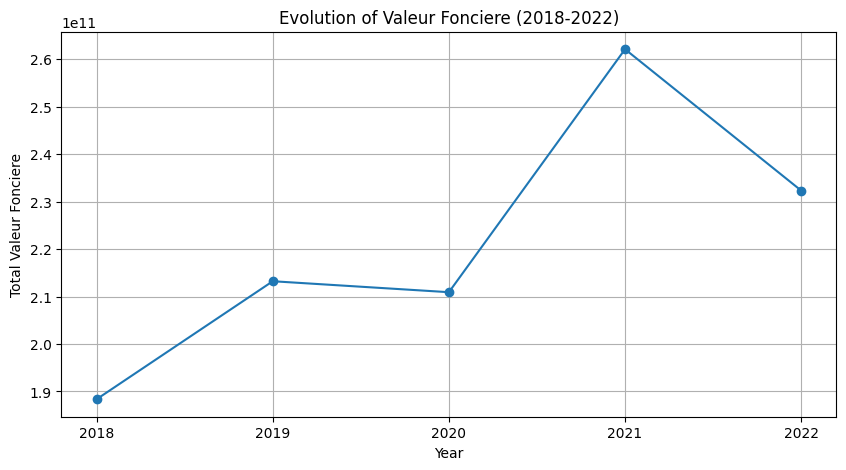

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_values_pd["annee"], yearly_values_pd["Total Valeur Fonciere"], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Valeur Fonciere')
plt.title('Evolution of Valeur Fonciere (2018-2022)')
plt.xticks(yearly_values_pd["annee"])
plt.grid()
plt.show()

In [82]:
dept_yearly_values = nn_df_with_location.groupBy(["annee", "Code departement"]).agg(sum("Valeur fonciere").alias("Total Valeur Fonciere")).orderBy("annee", "Code departement")
dept_yearly_values.show()

+-----+----------------+---------------------+
|annee|Code departement|Total Valeur Fonciere|
+-----+----------------+---------------------+
| 2018|              01|           1800898843|
| 2018|              02|            753398416|
| 2018|              03|            442914165|
| 2018|              04|            233106434|
| 2018|              05|            250754800|
| 2018|              06|           7336783466|
| 2018|              07|            447669184|
| 2018|              08|            321770539|
| 2018|              09|            181699140|
| 2018|              10|            566683738|
| 2018|              11|           1785608831|
| 2018|              12|            369281992|
| 2018|              13|           8327111619|
| 2018|              14|           2746750402|
| 2018|              15|            148844254|
| 2018|              16|            643541694|
| 2018|              17|           4129129004|
| 2018|              18|            399978467|
| 2018|      

In [46]:
dept_yearly_values_pd = dept_yearly_values.toPandas()


In [47]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


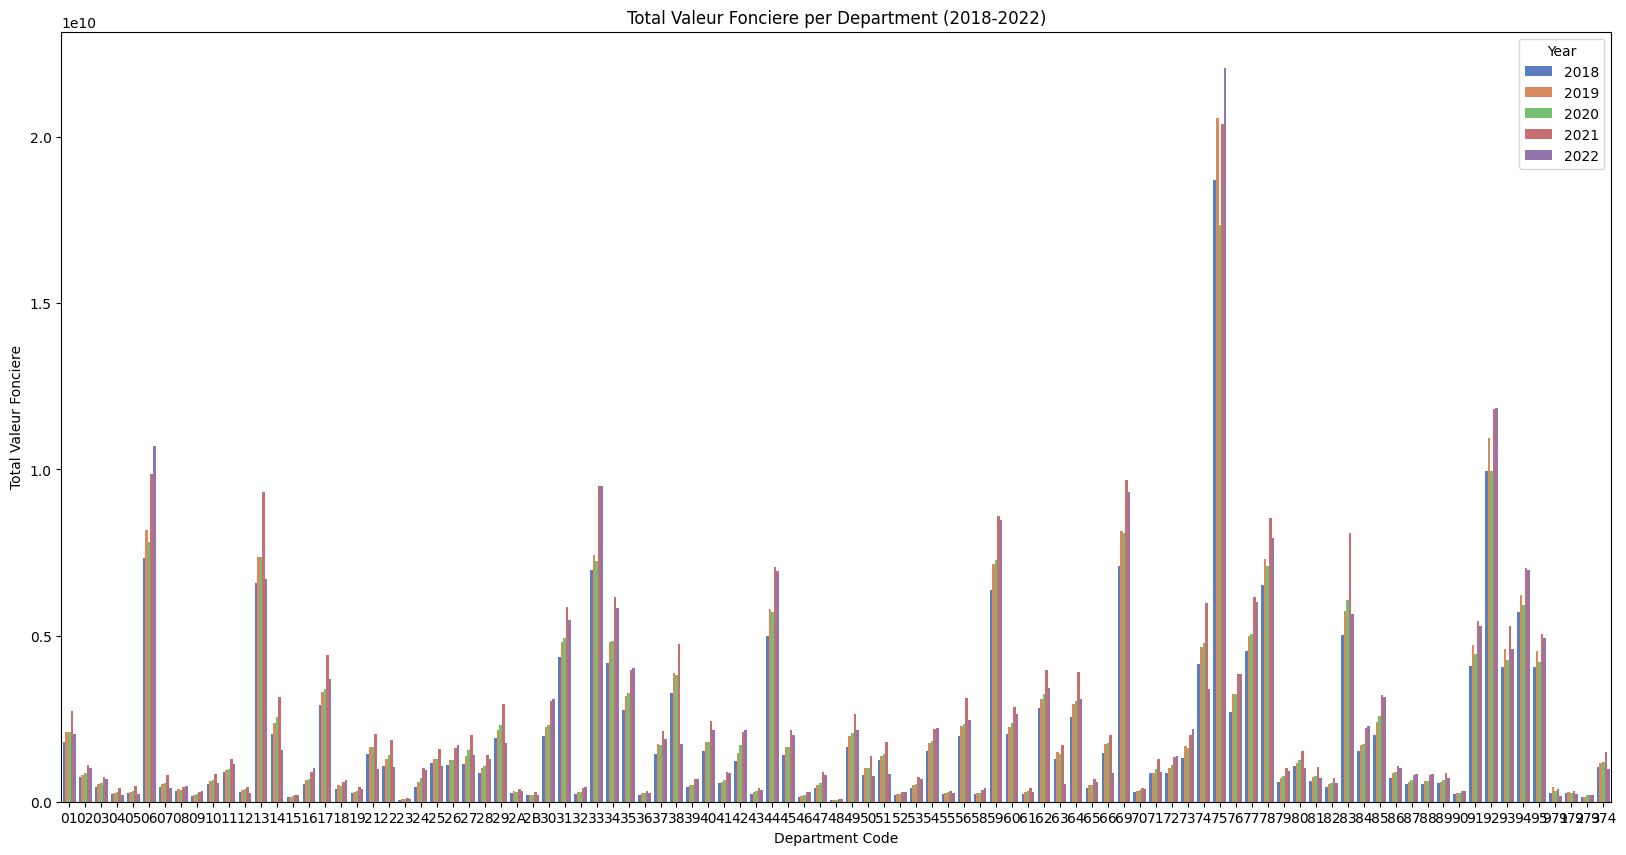

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.barplot(data=dept_yearly_values_pd, x='Code departement', y='Total Valeur Fonciere', hue='annee', palette='muted')
plt.xlabel('Department Code')
plt.ylabel('Total Valeur Fonciere')
plt.title('Total Valeur Fonciere per Department (2018-2022)')
plt.legend(title='Year')
plt.show()

In [49]:
dept59_yearly_values = dept_yearly_values.filter(col("Code departement") == "59").orderBy("annee")
dept59_yearly_values.show()

+-----+----------------+---------------------+
|annee|Code departement|Total Valeur Fonciere|
+-----+----------------+---------------------+
| 2018|              59|           6369627731|
| 2019|              59|           7146483366|
| 2020|              59|           7285226895|
| 2021|              59|           8596671126|
| 2022|              59|           8472691918|
+-----+----------------+---------------------+



In [50]:
dept59_yearly_values.count()

5

In [51]:
dept59_yearly_values_pd = dept59_yearly_values.toPandas()


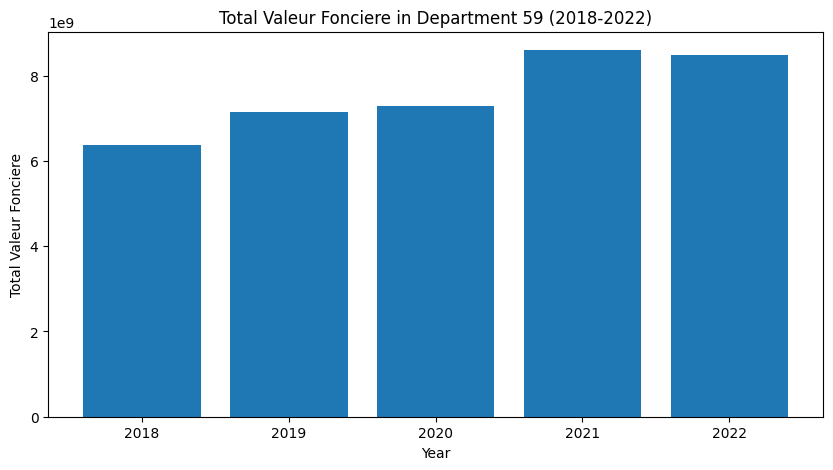

In [52]:
plt.figure(figsize=(10, 5))
plt.bar(dept59_yearly_values_pd["annee"], dept59_yearly_values_pd["Total Valeur Fonciere"])
plt.xlabel('Year')
plt.ylabel('Total Valeur Fonciere')
plt.title('Total Valeur Fonciere in Department 59 (2018-2022)')
plt.xticks(dept59_yearly_values_pd["annee"])
plt.show()

In [83]:
from pyspark.sql.functions import mean

dept_yearly_avg_values = nn_df_with_location.groupBy(["annee", "Code departement"]).agg(mean("Valeur fonciere").alias("Average Valeur Fonciere")).orderBy("annee", "Code departement")
dept_yearly_avg_values.show()

+-----+----------------+-----------------------+
|annee|Code departement|Average Valeur Fonciere|
+-----+----------------+-----------------------+
| 2018|              01|     230088.00856011244|
| 2018|              02|     122763.30715333225|
| 2018|              03|     105030.62959449846|
| 2018|              04|     147816.38173747621|
| 2018|              05|     160946.59820282413|
| 2018|              06|      287423.9389641934|
| 2018|              07|      154849.2507782774|
| 2018|              08|     109483.00068050357|
| 2018|              09|     113137.69613947696|
| 2018|              10|     127574.00675371454|
| 2018|              11|     127497.95294537664|
| 2018|              12|     120248.12504070335|
| 2018|              13|     245507.15310454625|
| 2018|              14|     174963.39907000447|
| 2018|              15|      97730.96126066973|
| 2018|              16|     128017.04674756316|
| 2018|              17|      218553.3797702853|
| 2018|             

In [54]:
dept59_yearly_avg_values = dept_yearly_avg_values.filter(col("Code departement") == "59").orderBy("annee")
dept59_yearly_avg_values.show()


+-----+----------------+-----------------------+
|annee|Code departement|Average Valeur Fonciere|
+-----+----------------+-----------------------+
| 2018|              59|     183483.44320898748|
| 2019|              59|      186465.6725460523|
| 2020|              59|      195303.9219076725|
| 2021|              59|      204960.8069522924|
| 2022|              59|      215431.1555849373|
+-----+----------------+-----------------------+



In [55]:
dept59_yearly_avg_values_pd = dept59_yearly_avg_values.toPandas()


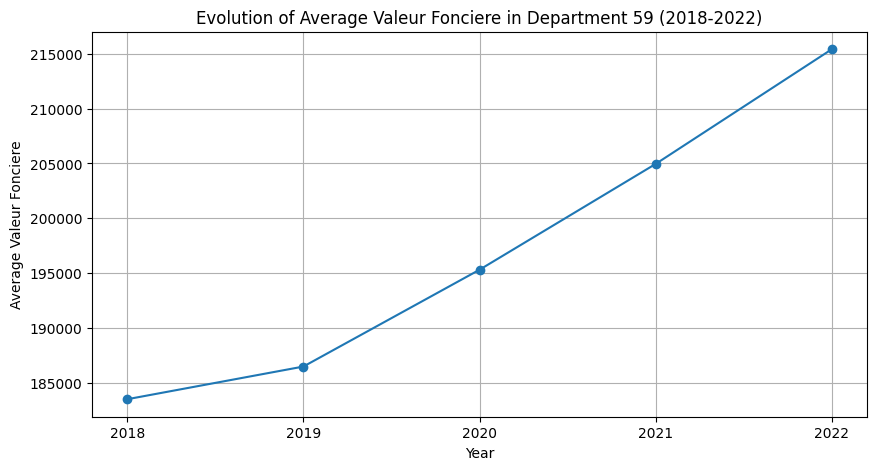

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(dept59_yearly_avg_values_pd["annee"], dept59_yearly_avg_values_pd["Average Valeur Fonciere"], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Valeur Fonciere')
plt.title('Evolution of Average Valeur Fonciere in Department 59 (2018-2022)')
plt.xticks(dept59_yearly_avg_values_pd["annee"])
plt.grid()
plt.show()


In [84]:
dept59_df = nn_df_with_location.filter(col("Code departement") == "59")
dept59_df_pd = dept59_df.toPandas()
dept59_df_pd['Date mutation'] = pd.to_datetime(dept59_df_pd['Date mutation'])


<ipython-input-84-1c8ac9c89d93>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dept59_df_pd['Date mutation'] = pd.to_datetime(dept59_df_pd['Date mutation'])


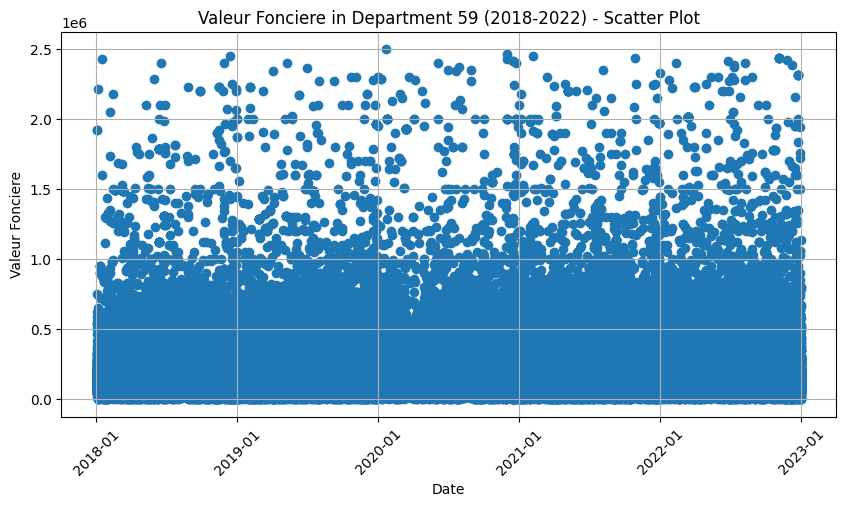

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.scatter(dept59_df_pd['Date mutation'], dept59_df_pd['Valeur fonciere'])
plt.xlabel('Date')
plt.ylabel('Valeur Fonciere')
plt.title('Valeur Fonciere in Department 59 (2018-2022) - Scatter Plot')

# Set the x-axis to display dates with a specific format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.grid()
plt.show()


In [85]:
lille_df = nn_df_with_location.filter((nn_df_with_location["Code departement"] == "59") & (nn_df_with_location["Commune"] == "fretin"))
lille_df.show(n=100)

+-------------+---------------+---------------+-------+------------+--------------------+-----------+-------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+------------+-----------+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|    latitude|  longitude|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+-------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+------------+-----------+
|   15/10/2021|          Vente|         255000|     23|         RUE|DES ANCIENS COMBA...|      59273| fretin|              59|                     null|                 79|                        3|            223| 2021|50.565756773|3.132009062|
|   19/02/2019| 

In [86]:
from pyspark.sql.functions import mean
dept59_df = nn_df_with_location.filter(col("Code departement") == "59")
commune_avg_values = dept59_df.groupBy("Commune").agg(mean("Valeur fonciere").alias("Average Valeur Fonciere"))
sorted_commune_avg_values = commune_avg_values.sort(col("Average Valeur Fonciere").desc())
sorted_commune_avg_values.show()

+--------------------+-----------------------+
|             Commune|Average Valeur Fonciere|
+--------------------+-----------------------+
|           merignies|      485369.3675213675|
|              gruson|     476580.39344262297|
|         escobecques|      461076.1904761905|
|             bondues|      446439.9003984064|
| radinghem en weppes|     406798.48913043475|
|sainghin en melan...|     404828.68131868134|
|             lompret|     400036.11811023625|
|          verlinghem|     398937.18954248365|
|ennetieres en weppes|      374246.5633802817|
|            cobrieux|             369100.625|
|   camphin en pevele|      364071.4621212121|
|             mouvaux|      357208.5776545166|
|     armbouts cappel|     353823.11267605633|
|         tourmignies|      348895.5535714286|
|         bourghelles|      345887.5806451613|
|              herrin|      345808.9285714286|
|          le maisnil|     344886.54545454547|
|              fretin|      341630.2113207547|
|    marcq en

In [88]:
dept59_df.show()

+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+------------+-----------+
|Date mutation|Nature mutation|Valeur fonciere|No voie|Type de voie|                Voie|Code postal|             Commune|Code departement|Surface Carrez du 1er lot|Surface reelle bati|Nombre pieces principales|Surface terrain|annee|    latitude|  longitude|
+-------------+---------------+---------------+-------+------------+--------------------+-----------+--------------------+----------------+-------------------------+-------------------+-------------------------+---------------+-----+------------+-----------+
|   13/10/2020|          Vente|         235000|   null|         RUE|    DU GEN DE GAULLE|      59133|           phalempin|              59|                   169,11|                145|                        4|           n

In [89]:
commune_avg_values.show()

+-------------------+-----------------------+
|            Commune|Average Valeur Fonciere|
+-------------------+-----------------------+
|           haulchin|      124596.1677852349|
|            estreux|      234808.4716981132|
|            maurois|                81440.0|
|         petit fayt|     154417.27272727274|
|          haut lieu|               142562.5|
|   douchy les mines|          115879.140625|
|saint pierre brouck|     172602.11538461538|
|             arleux|     151764.16129032258|
|            curgies|      197281.2840909091|
|           ecaillon|     155209.18032786885|
|            herlies|               269977.3|
|           rumegies|     259912.78787878787|
|          robersart|     121271.42857142857|
|            roubaix|     165905.67444480205|
|           sequedin|     248317.01923076922|
|                don|     235415.16842105263|
|           rexpoede|      182571.8842105263|
|              marly|      135509.1062992126|
|              clary|     115541.8

In [87]:
dept59_df.dtypes

[('Date mutation', 'string'),
 ('Nature mutation', 'string'),
 ('Valeur fonciere', 'int'),
 ('No voie', 'string'),
 ('Type de voie', 'string'),
 ('Voie', 'string'),
 ('Code postal', 'string'),
 ('Commune', 'string'),
 ('Code departement', 'string'),
 ('Surface Carrez du 1er lot', 'string'),
 ('Surface reelle bati', 'string'),
 ('Nombre pieces principales', 'string'),
 ('Surface terrain', 'string'),
 ('annee', 'int'),
 ('latitude', 'string'),
 ('longitude', 'string')]

In [90]:
!pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import folium

# Calculate the average "Valeur fonciere" for each commune
avg_valeur_per_commune = dept59_df.groupBy("Commune").agg({"Valeur fonciere": "mean", "latitude": "first", "longitude": "first"}).withColumnRenamed("avg(Valeur fonciere)", "Average Valeur Fonciere")
avg_valeur_per_commune_pd = avg_valeur_per_commune.na.drop(subset=["first(latitude)", "first(longitude)"]).toPandas()

# Create a map centered on the department 59
dept59_map = folium.Map(location=[50.5, 3.0], zoom_start=10)

# Normalize the average values for setting the color intensity
max_value = avg_valeur_per_commune_pd["Average Valeur Fonciere"].max()
min_value = avg_valeur_per_commune_pd["Average Valeur Fonciere"].min()

# Add markers for each commune on the map
for index, row in avg_valeur_per_commune_pd.iterrows():
    color_intensity = (row["Average Valeur Fonciere"] - min_value) / (max_value - min_value)
    folium.CircleMarker(
        location=[row["first(latitude)"], row["first(longitude)"]],
        radius=5,
        color=None,
        fill=True,
        fillColor="blue",
        fill_opacity=color_intensity,
        tooltip=f"{row['Commune']}: {row['Average Valeur Fonciere']:.2f}",
    ).add_to(dept59_map)

# Display the map
dept59_map


In [103]:
import branca.colormap as cm
import folium

# Calculate the average "Valeur fonciere" for each commune
avg_valeur_per_commune = dept59_df.groupBy("Commune").agg({"Valeur fonciere": "mean", "latitude": "first", "longitude": "first"}).withColumnRenamed("avg(Valeur fonciere)", "Average Valeur Fonciere")
avg_valeur_per_commune_pd = avg_valeur_per_commune.na.drop(subset=["first(latitude)", "first(longitude)"]).toPandas()

# Create a map centered on the department 59
m = folium.Map(location=[50.5, 3.0], zoom_start=10)

# Create a custom color scale
min_valeur = avg_valeur_per_commune_pd["Average Valeur Fonciere"].min()
max_valeur = avg_valeur_per_commune_pd["Average Valeur Fonciere"].max()
color_scale = cm.LinearColormap(colors=["lightblue", "blue", "purple", "red", "darkred"], vmin=min_valeur, vmax=max_valeur).to_step(n=10)


for index, row in avg_valeur_per_commune_pd.iterrows():
    folium.CircleMarker(
        location=[row["first(latitude)"], row["first(longitude)"]],
        radius=5,
        color=color_scale(row["Average Valeur Fonciere"]),
        fill=True,
        fill_opacity=0.7,
        tooltip=f"{row['Commune']}: {row['Average Valeur Fonciere']:.2f}",

    ).add_to(m)

color_scale.caption = "Average Valeur Fonciere"
m.add_child(color_scale)

m
